sourceA  destA  amount
0      1232   3214       2
1      1234   1232       2
2      1234   2456       1
3      1234   3245       3
4      1234   3873       1
5      1236   1238       1
6      1236   2345       1
7      1238   6554       1
8      1443   1236       1
9      1443   2342       2
10     1443   3873       3
11     2133   2312       1
12     2133   2344       1
13     2133   3532       1
14     2312   4556       2
15     2321   2312       1
16     2341   2345       2
17     2342   2133       1
18     2342   2344       1
19     2344   2341       1
20     2345   2321       1
21     2345   6554       1
22     2456   1245       1
23     3214   1234       1
24     3214   2133       1
25     3214   2312       1
26     3214   2321       1
27     3245   2342       1
28     3245   3456       1
29     3245   4556       1
30     3456   2341       1
31     3873   1236       1
32     3873   2133       1
33     3873   5536       2
34     4556   2341       2
35     4567   2133       1
36     5536   2342       1
37     6554   2345       1

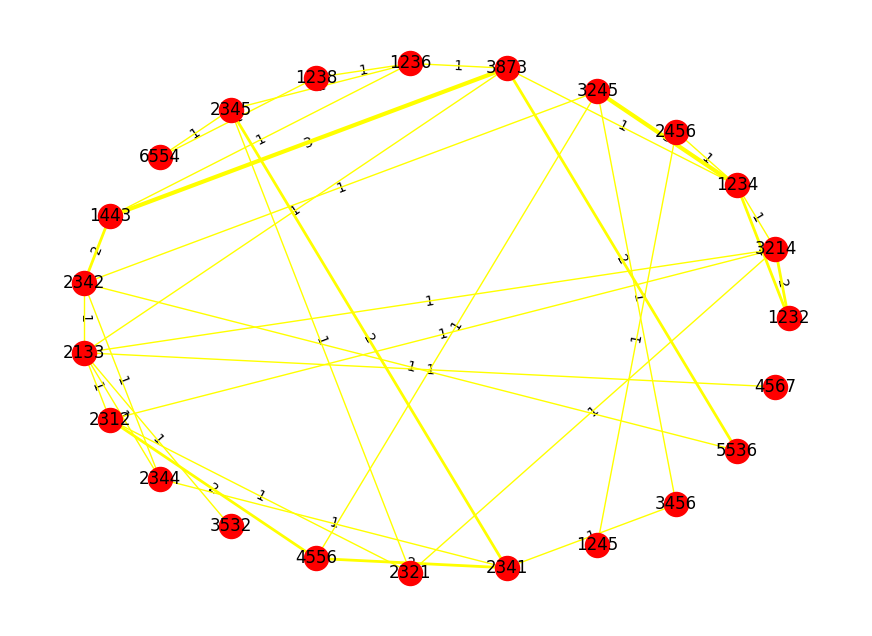

In [3]:
import sys
import pandas as pd
import numpy as np
import networkx as nx
import scipy as sp
import pyvis
import matplotlib.pyplot as plt


df = pd.read_csv('C:\\Users\\Dhiraj\\Videos\\Fraud_Detection\\transactiondata.csv')

#sort the cases as a->b and b ->a
df.sort_values(by=['sourceA','destA'],inplace=True,ignore_index=True)
df
#grouping

df = df.groupby(['sourceA','destA'],sort=False,as_index=False).count()

# graph visualization and analysis on graph

# create graph from pandas data frame
# create Graph object
G = nx.from_pandas_edgelist(df,source='sourceA',
                             target='destA',
                             edge_attr='amount',
                             create_using = nx.Graph())

# Graph visualization-Networkx
plt.figure(figsize=(11,8))
#draw circular layout
pos = nx.circular_layout(G)
labels = nx.get_edge_attributes(G,'amount')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw(G,with_labels=True,node_color='red',edge_color='yellow',pos=pos,width = [ d['amount'] for _,_, d in G.edges(data=True)])


In [7]:
# community detection
#community detection(Louvain)

"""import community as community_louvain

communities = community_louvain.best_partition(G)
communities
nx.set_node_attributes(G,communities,'group')
"""
# Graph visualization with-Pyvis


from pyvis.network import Network
#initialize a newtwork
net = Network(notebook=False,width='1000px',height='700px',bgcolor='#222222',font_color='white')
nodes = list(set([*df.sourceA,*df.destA]))
net.add_nodes(nodes)
# pyvix intreface with newtworkx library
node_degree = dict(G.degree)
net.from_nx(G)
net.show('index1.html') #call show method and create html
